In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from gurobipy import *
from itertools import combinations
import heapq as hq
from random import sample
import pandas as pd
import math
import csv
import numpy as np


from sklearn.cluster import SpectralClustering
from sklearn import metrics
import operator

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [6, 4] ## set the size of all figures

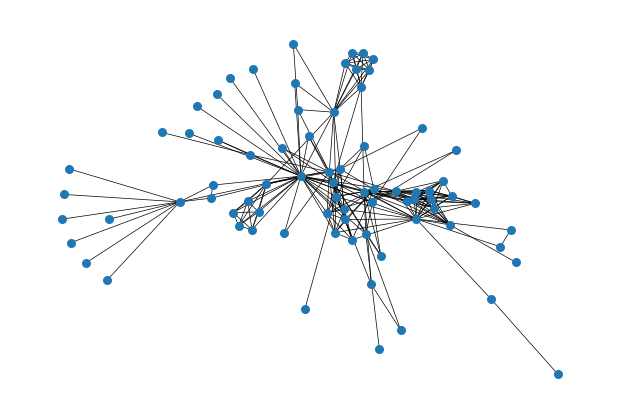

In [28]:
G = nx.les_miserables_graph()
pos=nx.spring_layout(G)
nx.draw(G, pos, node_size=30, width=0.5)

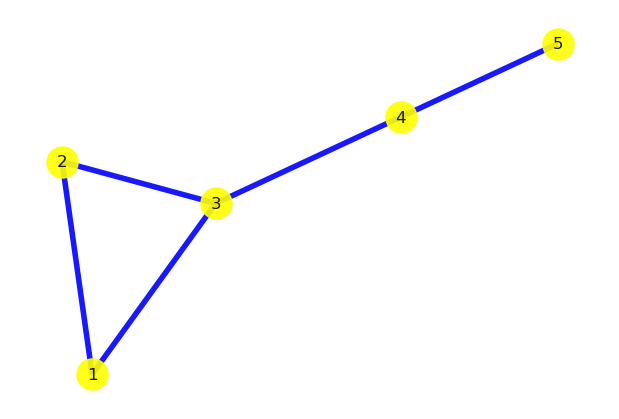

In [32]:
G = nx.Graph()
node_tuple = [(1,2), (1,3), (2,3), (3,4), (4,5)]

G.add_edges_from(node_tuple)

pos=nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_size=500,  node_color='yellow', alpha = 0.9, edge_color = "blue", width = 4)


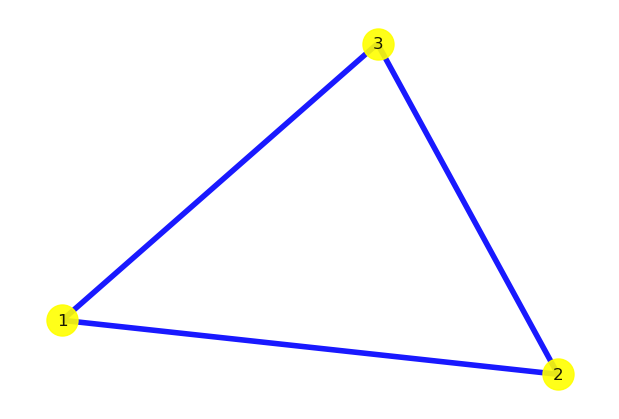

In [39]:
G = nx.Graph()
node_tuple = [(1,2), (1,3), (2,3)]

G.add_edges_from(node_tuple)

pos=nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_size=500,  node_color='yellow', alpha = 0.9, edge_color = "blue", width = 4)


In [40]:
# G = nx.karate_club_graph()
# pos=nx.spring_layout(G)
# nx.draw(G, pos, node_size=30, width=0.5)

In [41]:
model=Model("max_clique")
x=model.addVars(G.nodes(), vtype=GRB.BINARY)

for (i,j) in combinations(G.nodes(),2):
    if (i,j) not in G.edges():
        model.addConstr(x[i]+x[j]<=1)
        
expr = 0
for i in G.nodes():
    expr += x[i]
model.setObjective(expr, GRB.MAXIMIZE)        
    
model.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x06b86891
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 3.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


In [42]:
int(expr.getValue())

3

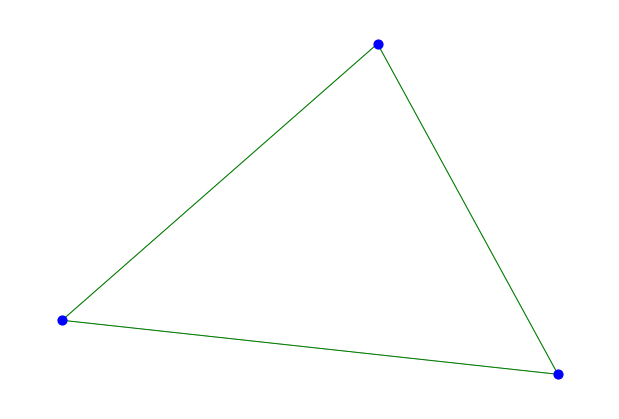

In [43]:
clique_nodes=[i for i in G.nodes() if x[i].X==1]
clique_edges=[(i,j) for (i,j) in G.edges() if i in clique_nodes and j in clique_nodes]

nx.draw(G, pos, node_size=30, width=0.5, alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=clique_edges, edge_color='g', width=0.75)
nx.draw_networkx_nodes(G, pos, nodelist=clique_nodes, node_color='b', node_size=40)